In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygmt

In [2]:
years=range(2005,2023)
for nyr,year in enumerate(years):
    pdbh=pd.read_csv(f'Annual_BH/OUTPUT_BH_{year}.csv')
    pdhh=pd.read_csv(f'Annual_HH/OUTPUT_HH_{year}.csv')
    pdbh=pdbh[(pdbh.stlo<-116) & (pdbh.stla>41.8)]
    pdhh=pdhh[(pdhh.stlo<-116) & (pdhh.stla>41.8)]
    if nyr == 0:
        pdcomb=pd.concat([pdbh,pdhh])
    else:
        pdcomb=pd.concat([pdcomb,pdbh,pdhh])

/tmp/ipykernel_417080/2330131566.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdcomb=pd.concat([pdcomb,pdbh,pdhh])
/tmp/ipykernel_417080/2330131566.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pdcomb=pd.concat([pdcomb,pdbh,pdhh])
/tmp/ipykernel_417080/2330131566.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To ret

In [3]:
cat_stlo=[]
cat_stla=[]
cat_meanb=[]
cat_meanQ=[]
cat_netst=[]
cat_fband=[]
cat_count=[]


for k, freq in enumerate(pdcomb.fband.unique()):
    single_pnwbb=pdcomb.loc[pdcomb.fband == freq]
    fmax=float(freq.split('-')[1])
    fmin=float(freq.split('-')[0])
    for nstm, st in enumerate(single_pnwbb.netst.unique()):
        single_pnwbb_st=single_pnwbb.loc[single_pnwbb.netst == st]
        count=single_pnwbb_st.stlo.count()
        stlo=single_pnwbb_st.stlo.unique()[0]
        stla=single_pnwbb_st.stla.unique()[0]
        if count > 1:
            value=single_pnwbb_st.intQ.mean()
            meanb=single_pnwbb_st.intb.mean()
        elif count == 1:
            value=single_pnwbb_st.intQ.unique()[0]
            meanb=single_pnwbb_st.intb.unique()[0]
        else:
            continue
        print(freq, st, stlo, stla, value, count,fmax,fmin)

        cat_stlo.append(stlo)
        cat_stla.append(stla)
        cat_meanQ.append(value)
        cat_meanb.append(meanb)
        cat_netst.append(st)
        cat_fband.append(freq)
        cat_count.append(count)

catpd=pd.DataFrame({'fband':cat_fband, 'netst':cat_netst, 'stlo':cat_stlo, 'stla':cat_stla, 'meanb':cat_meanb,
                    'meanQ':cat_meanQ, 'ncount':cat_count,  })


0.5-1.0 LI.LTH -119.417679 46.4617 58.905 2 1.0 0.5
0.5-1.0 TA.F03A -123.559097 45.930599 471.239 4 1.0 0.5
0.5-1.0 TA.I05A -121.267502 44.162601 14.894 3 1.0 0.5
0.5-1.0 XN.A04 -122.916397 59.981098 471.239 1 1.0 0.5
0.5-1.0 XN.B01 -123.267601 58.898499 471.239 1 1.0 0.5
0.5-1.0 XN.B05 -125.766998 58.9305 94.248 1 1.0 0.5
0.5-1.0 XN.B12 -131.7444 59.932999 42.84 1 1.0 0.5
0.5-1.0 XN.C02 -122.713898 58.0965 235.619 1 1.0 0.5
0.5-1.0 XN.C08 -120.743301 56.264599 471.239 1 1.0 0.5
0.5-1.0 XN.C10 -119.8853 55.462101 39.27 1 1.0 0.5
0.5-1.0 XN.C12 -118.367401 55.1987 33.66 1 1.0 0.5
0.5-1.0 UW.ERW -122.626007 48.453838 235.619 1 1.0 0.5
0.5-1.0 UW.SP2 -122.249229 47.55629 307.30266666666665 9 1.0 0.5
0.5-1.0 TA.A04A -122.707001 48.7197 52.36 1 1.0 0.5
0.5-1.0 TA.B04A -123.503998 48.057499 471.239 2 1.0 0.5
0.5-1.0 TA.B05A -122.096001 48.264099 471.239 2 1.0 0.5
0.5-1.0 TA.C05A -121.689499 47.694698 18.413666666666668 3 1.0 0.5
0.5-1.0 TA.D05A -121.9888 47.188099 52.36 1 1.0 0.5
0.5-1.0 TA.

In [4]:
catpd.describe()

,stlo,stla,meanb,meanQ,ncount
count,822.000000,822.000000,822.000000,822.000000,822.000000
mean,-121.726106,46.687805,0.248470,261.953782,2.496350
std,2.692552,3.117535,0.325334,410.232099,2.199958
min,-137.738098,42.019199,0.010000,5.544000,1.000000
25%,-122.772301,44.676498,0.040000,33.420500,1.000000
50%,-121.961849,46.634507,0.150000,67.320000,2.000000
75%,-120.339447,47.633865,0.319167,376.991000,3.000000
max,-116.139999,59.981098,2.990000,1884.956000,13.000000


In [5]:
catpd.to_csv('Annual_BB_Q.csv', index=False)

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
/tmp/ipykernel_417080/2429452781.py:17: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'series' instead.
  pygmt.makecpt(cmap='hot', T='0.5/8.5/1', continuous=False, reverse=True)


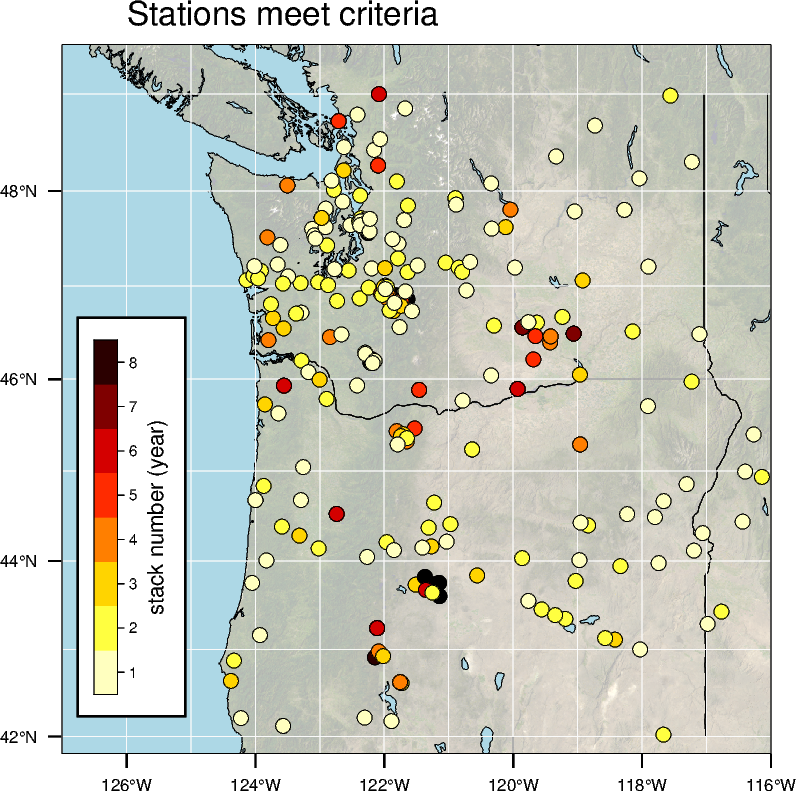

In [6]:

# PNW - Q
region=[-127,-116,41.8,49.5]
proj='M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,250' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
for k, freq in enumerate(catpd.fband.unique()):
    if k > 0:
        break
    single_pnwbb=catpd.loc[catpd.fband == freq]
    fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=70, )
    fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)

    # Make a logarithmic color palette
    pygmt.makecpt(cmap='hot', T='0.5/8.5/1', continuous=False, reverse=True)
    # seismic stations
    fig.plot(x=single_pnwbb.stlo, y=single_pnwbb.stla, cmap=True, style = "c0.05i", pen='0.1p', fill=single_pnwbb.ncount)    
    fig.text(x=-126,y=49.7,text=f'Stations meet criteria', font="8p,Helvetica,0", no_clip=True, justify="BL" )
    

pygmt.config(FONT_ANNOT='8p',)
fig.shift_origin(xshift="-6.5c", yshift="-1c")
fig.colorbar( cmap=True,   position="JRM+w3c/0.2c",   frame=["a1", "x+lstack number (year)"], box="+gwhite+p0.5p", )

# fig.legend(position='JTL+jTL+o0.2c', box='+gwhite+p0.5p', )
fig.show()
fname='MAP_STA_2005-2022.png'
fig.savefig(fname, dpi=600)

coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
/tmp/ipykernel_417080/4200270423.py:15: SyntaxWarning: Short-form parameter (T) is not recommended. Use long-form parameter 'series' instead.
  pygmt.makecpt(cmap='viridis', T='0/3.5', continuous=True, log=True)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
coast [WARNING]: 0/0.1 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


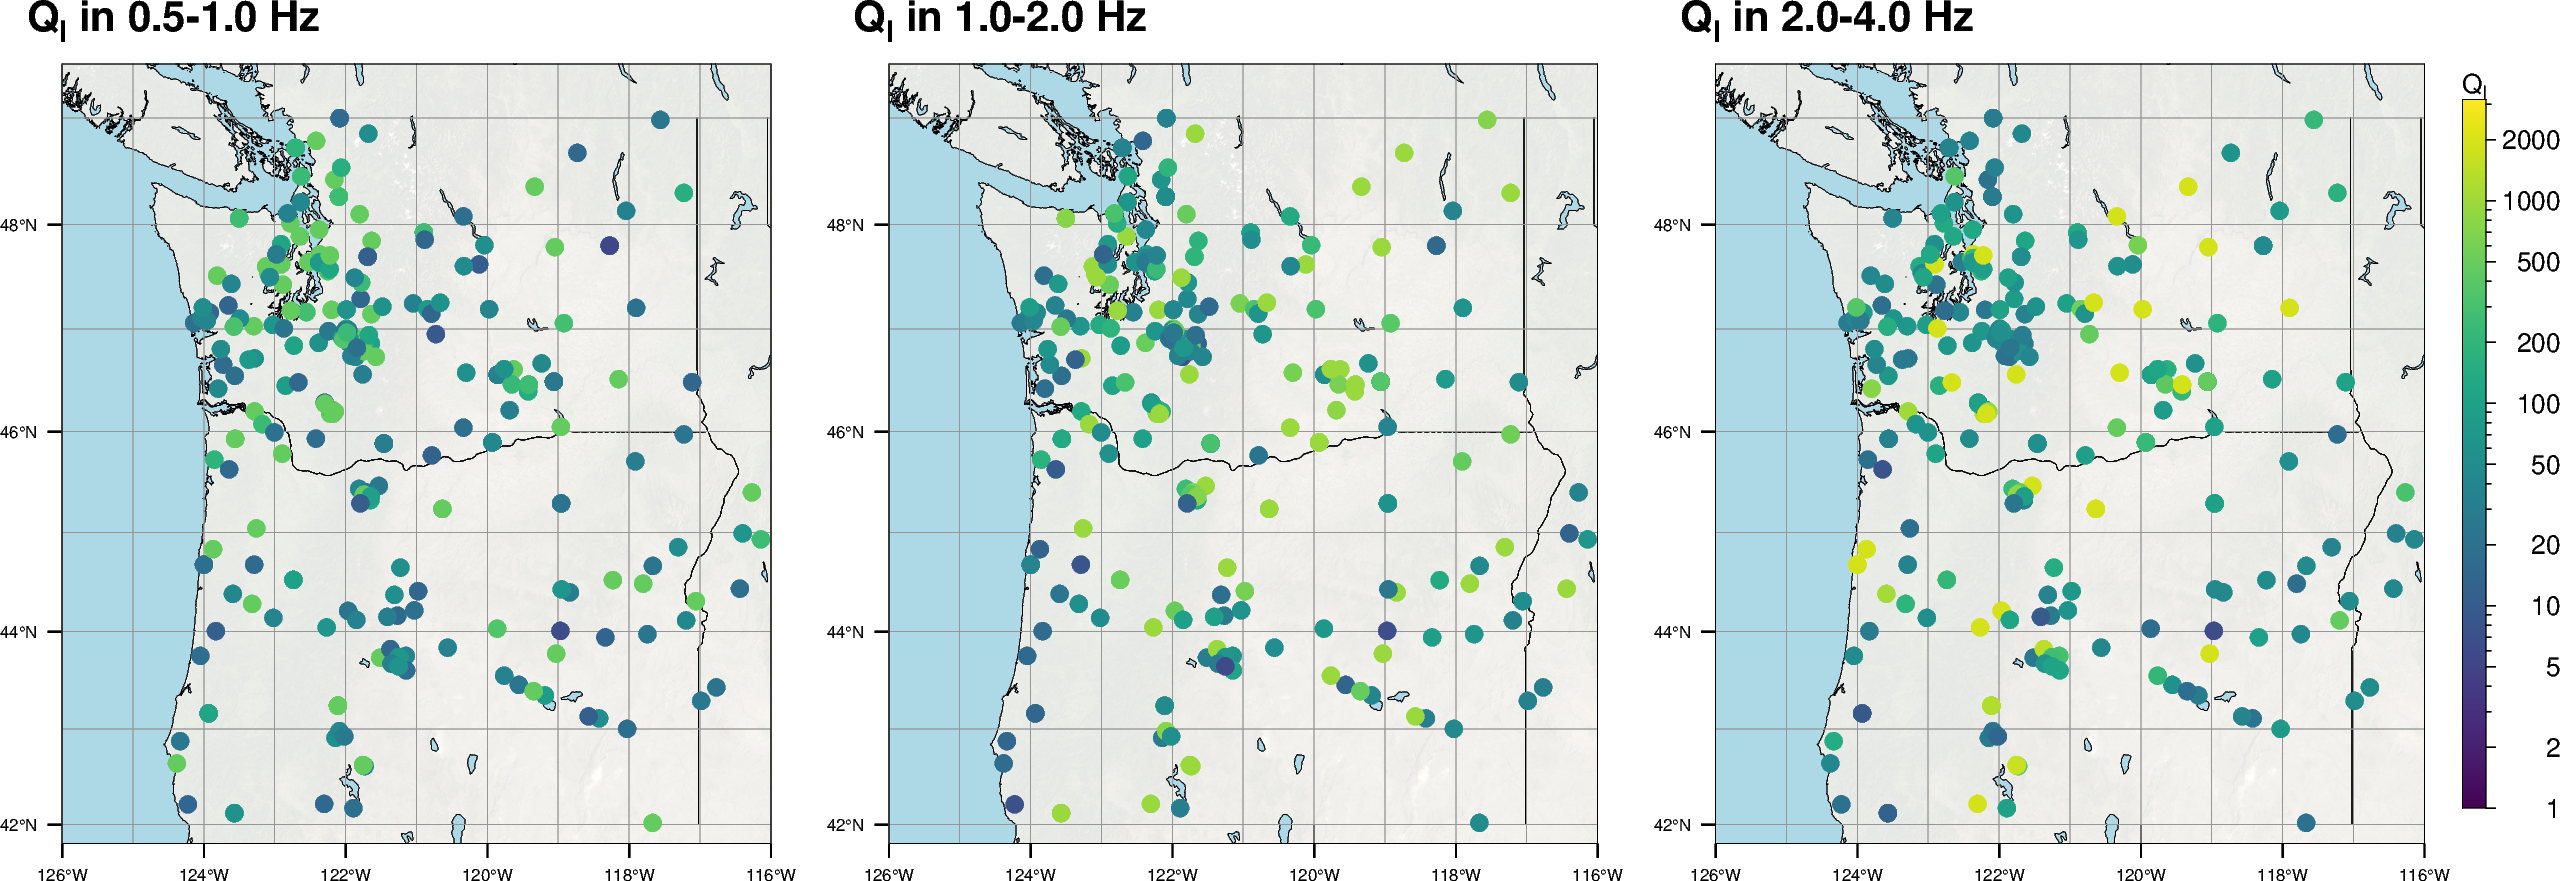

In [7]:

# PNW - Q
region=[-126,-116,41.8,49.5]
proj='M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
for k, freq in enumerate(catpd.fband.unique()):
    single_pnwbb=catpd.loc[catpd.fband == freq]
    fig.grdimage(grid='@earth_day_30s', projection=proj, transparency=90, )
    fig.coast(region=region, projection=proj, frame="a2g1", resolution="f", borders="2/0.05p",
            water='lightblue', shorelines='0/0.1p',)

    # Make a logarithmic color palette
    pygmt.makecpt(cmap='viridis', T='0/3.5', continuous=True, log=True)

    # seismic stations
    # fig.plot(x=single_pnwbb.stlo, y=single_pnwbb.stla, size=0.05*single_pnwbb.ncount , cmap=True, style = "cc", fill=single_pnwbb.meanQ)    
    fig.plot(x=single_pnwbb.stlo, y=single_pnwbb.stla, cmap=True, style = "c0.06i", fill=single_pnwbb.meanQ)    
    fig.text(x=-126.5,y=49.8,text=f'Q@-I@- in {freq} Hz', font="10p,Helvetica-Bold,0", no_clip=True, justify="BL" )
    
    fig.shift_origin(xshift="7c")
pygmt.config(FONT_ANNOT='10p',)
fig.shift_origin(xshift="-7.5c")
fig.colorbar( cmap=True, log=True,   position="JRM+w6c/0.2c",     frame=["a2f3", "y+lQ@-I@-"],)

# fig.legend(position='JTL+jTL+o0.2c', box='+gwhite+p0.5p', )
fig.show()
fname='MAP_Q_comb.png'
fig.savefig(fname, dpi=600)

In [8]:
data=catpd.copy()
data['Q-1']=1/data.meanQ


In [9]:
vsfn='sta_waro_vs30.csv'
pd_vs=pd.read_csv(vsfn)
pd_vs.head(5)


,Unnamed: 0,fband,netst,stlo,stla,meanb,meanQ,ncount,nearest_lon,nearest_lat,vs30
0,0,0.5-1.0,LI.LTH,-119.417679,46.461700,0.080000,58.905,2,-119.4174,46.4613,266.2870
1,1,0.5-1.0,TA.F03A,-123.559097,45.930599,0.010000,471.239,4,-123.5593,45.9313,520.5142
2,2,0.5-1.0,TA.I05A,-121.267502,44.162601,0.316667,14.894,3,-121.2674,44.1633,425.7540
3,3,0.5-1.0,XN.A04,-122.916397,59.981098,0.010000,471.239,1,-123.0373,49.0012,318.9740
4,4,0.5-1.0,XN.B01,-123.267601,58.898499,0.010000,471.239,1,-123.0833,49.0012,324.2436


In [10]:
vs30=[]
for st in data.netst:
    vs=pd_vs.loc[pd_vs.netst==st]['vs30'].values[0]
    vs30.append(vs)
    
data['vs30']=vs30
data['Q-1']=1/data.meanQ
data['fmid']=data.fband.str.split('-').apply(lambda x: (float(x[0])+float(x[1]))/2)
data.to_csv('Annual_BBQ_comb.csv',index=False)

coast [WARNING]: 0/0.05 not a valid number and may not be decoded properly.
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


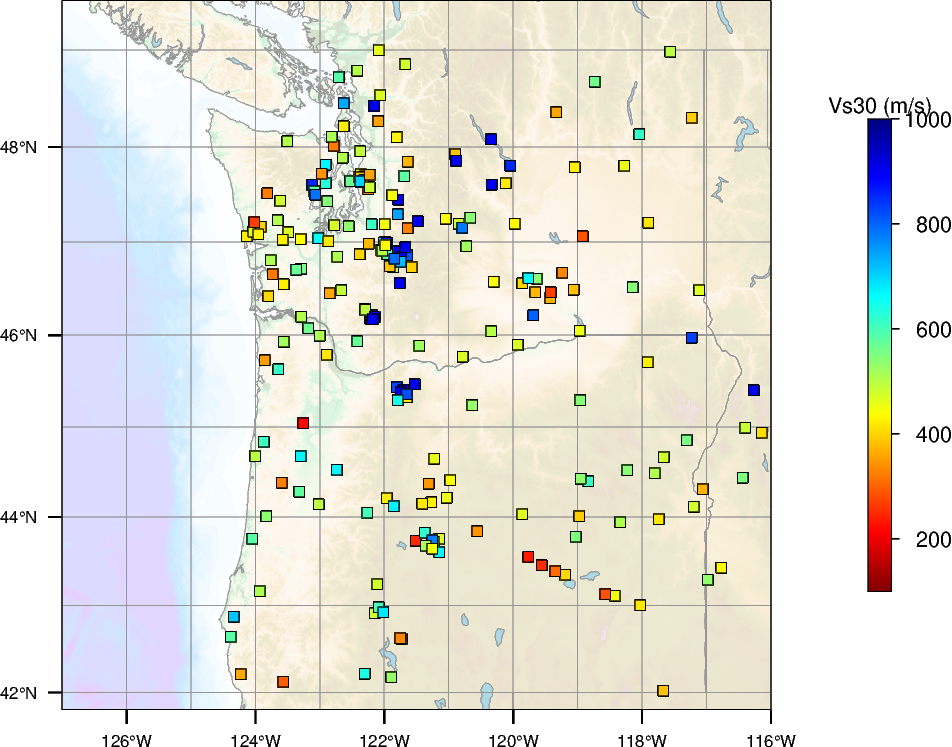

In [11]:

# PNW - Q
region=[-127,-116,41.8,49.5]
proj='M6c'
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.01p,150' , MAP_FRAME_PEN='0.15p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.12p", FONT_TITLE="12p", FONT_ANNOT='4p',  )
    
grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid=grid, projection=proj,cmap="globe", transparency=80)
fig.coast(region=region, projection=proj, frame="a2g1",  resolution="f", borders="2/0.05p,150",
          lakes='lightblue',shorelines='0/0.05p,150',)

cmap=pygmt.makecpt(cmap='jet', reverse=True ,series=[100,1000], continuous=True,)
# seismic stations
fig.plot(x=pd_vs.stlo, y=pd_vs.stla, style = "s0.05i", pen='0.1',  fill=pd_vs.vs30, cmap=True)
pygmt.config(FONT_ANNOT='10p',)
fig.colorbar( cmap=True,   position="JRM+w4c/0.2c",     frame=["a200", "y+lVs30 (m/s)"],)
      

#fig.text(x=-120,y=42.1,text='Frequency: '+freq+' Hz',font="10p,Helvetica,0", justify="BL",fill='white')
#fig.text(x=-126,y=49.4,text='HH-/BH-stations in 2010-2022', font="12p,Helvetica-Bold,0", no_clip=True, justify="BL" )

fig.show()
fname='BBQ_MAP_STA_vs30.png'
fig.savefig(fname, dpi=300)